In [3]:
#http://soft-matter.github.io/trackpy/v0.3.2/introduction.html#introduction

In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [4]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

directory = r'C:\data\191127\FSM-2D'
filename = 'C:\data\191127\FSM-2D'    
    
frames = gray(pims.open(  directory  +'\\'+  '*.png'))

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\pims\api.py:191: UserWarning: <class 'pims.image_reader.ImageReader'> errored: No such file: 'C:\data\191127\FSM-2D\*.png'
  warn(message)
c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\pims\api.py:191: UserWarning: <class 'pims.image_reader.ImageReaderND'> errored: No such file: 'C:\data\191127\FSM-2D\*.png'
  warn(message)
c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\pims\api.py:191: UserWarning: <class 'pims.imageio_reader.ImageIOReader'> errored: No such file: 'C:\data\191127\FSM-2D\*.png'
  warn(message)


UnknownFormatError: All handlers returned exceptions:
<class 'pims.image_reader.ImageReader'> errored: No such file: 'C:\data\191127\FSM-2D\*.png'
<class 'pims.image_reader.ImageReaderND'> errored: No such file: 'C:\data\191127\FSM-2D\*.png'
<class 'pims.imageio_reader.ImageIOReader'> errored: No such file: 'C:\data\191127\FSM-2D\*.png'


In [5]:
directory = r'C:\data\191127\FSM-2D'
filename = '191127FSM10 FSM-2D Z.dat'
usersDf = pd.read_csv(directory+'\\' + filename, skiprows=0,delimiter ='\t',header=None).values



In [6]:
usersDf

array([[7.42, 6.44, 6.74, ..., 8.3 , 8.94, 7.9 ],
       [8.98, 8.16, 7.08, ..., 8.14, 7.8 , 8.1 ],
       [8.76, 8.92, 7.7 , ..., 7.7 , 8.14, 7.56],
       ...,
       [6.16, 6.26, 6.56, ..., 6.42, 7.28, 7.28],
       [6.86, 6.48, 6.4 , ..., 6.82, 7.92, 7.22],
       [7.7 , 7.04, 6.64, ..., 7.24, 8.1 , 7.92]])

In [7]:
f = tp.locate(usersDf, 5, invert=False)

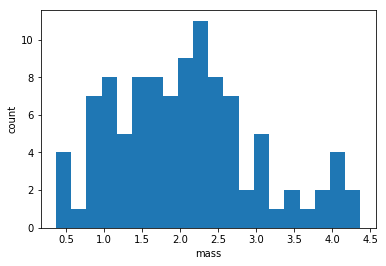

In [8]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');


In [9]:
f = tp.locate(usersDf, 5, invert=False,minmass=2)
f.shape[0]

51

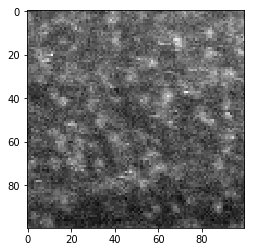

In [11]:
plt.imshow(usersDf)

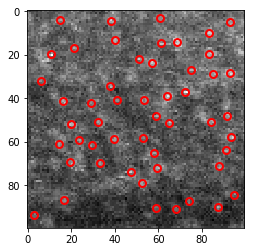

In [12]:
tp.annotate(f, usersDf,plot_style={'markersize':7});

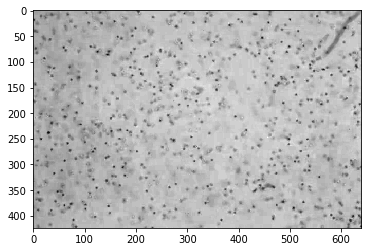

In [8]:
plt.imshow(frames[0]);

In [9]:
frames[123].frame_no

123

In [10]:
frames[123].metadata  # Scientific formats can pass experiment meta data here.

{}

In [11]:
f = tp.locate(frames[0], 11, invert=True)

In [12]:
f.head()  # shows the first few rows of data

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,4.750000,103.668564,192.862485,2.106615,0.066390,10.808405,10714.0,0.073666,0
1,5.249231,585.779487,164.659302,2.962674,0.078936,4.222033,10702.0,0.075116,0
2,5.785986,294.792544,244.624615,2.244542,0.219217,15.874846,10686.0,0.077141,0
3,5.869369,338.173423,187.458282,2.046201,0.185333,13.088304,10554.0,0.099201,0
4,6.746377,310.584169,151.486558,3.103294,0.053342,4.475355,10403.0,0.147430,0


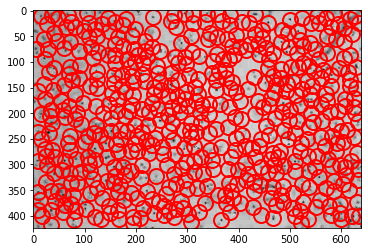

In [13]:
tp.annotate(f, frames[0]);

In [32]:
help(tp.annotate)

Help on function annotate in module trackpy.plots:

annotate(centroids, image, circle_size=None, color=None, invert=False, ax=None, split_category=None, split_thresh=None, imshow_style={}, plot_style={})
    Mark identified features with white circles.
    
    Parameters
    ----------
    centroids : DataFrame including columns x and y
    image : image array (or string path to image file)
    circle_size : Deprecated.
        This will be removed in a future version of trackpy.
        Use `plot_style={'markersize': ...}` instead.
    color : single matplotlib color or a list of multiple colors
        default None
    invert : If you give a filepath as the image, specify whether to invert
        black and white. Default True.
    ax : matplotlib axes object, defaults to current axes
    split_category : string, parameter to use to split the data into sections
        default None
    split_thresh : single value or list of ints or floats to split
        particles into sections for

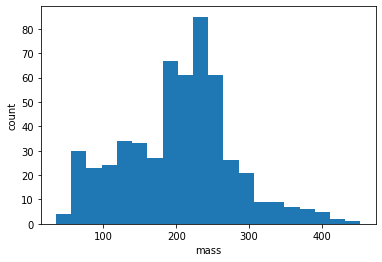

In [14]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [29]:
f = tp.locate(frames[0], 11, invert=True, minmass=400)
f.shape

(4, 9)

In [30]:
f

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
133,109.089366,628.596455,452.601979,2.564831,0.221825,18.408066,10963.0,0.052596,0
184,145.061302,473.350327,400.839850,3.122052,0.400480,13.763829,10980.0,0.051589,0
328,252.600652,272.937653,414.434797,2.618192,0.135417,17.057015,11066.0,0.047032,0
452,350.961204,430.881390,417.896865,2.775750,0.370467,16.803693,10910.0,0.056006,0


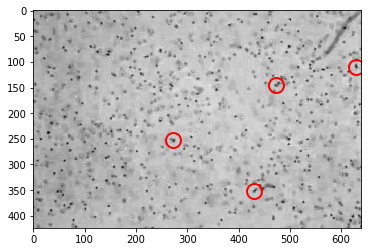

In [31]:
tp.annotate(f, frames[0]);

##### Let's track the FSM images

In [34]:
directory = r'C:\data\191122\FSM-2D'
    
    
frames = gray(pims.open(  directory  +'\\'+  '191122FSM21 FSM-2D.BMP'))

In [35]:
frames

(ImageReader,) processed through proc_func. Original repr:
    <Frames>
    Length: 1 frames
    Frame Shape: 90 x 90
    Pixel Datatype: uint8

In [48]:


datfile = '191122FSM21 FSM-2D Z.dat'

usersDf = pd.read_csv(directory+'\\' + datfile, skiprows=0,delimiter ='\t',header=None).values



Frame([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
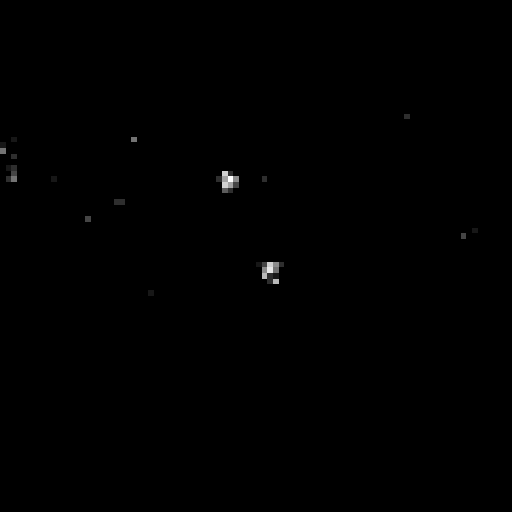

In [36]:
frames[0]

In [49]:
usersDf

array([[37. , 36.6, 36.8, ..., 36.2, 37. , 36.8],
       [36. , 43. , 39. , ..., 30.8, 33.8, 28.6],
       [40.8, 34.2, 41. , ..., 27.8, 26.6, 28.2],
       ...,
       [27. , 27.4, 30. , ..., 26.8, 26. , 28.4],
       [24.4, 25.6, 25.6, ..., 19.2, 22.6, 22.2],
       [29.8, 28.4, 27.2, ..., 24.4, 27.4, 26. ]])

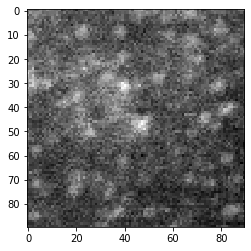

In [50]:
plt.imshow(usersDf);

In [37]:
print(frames[0])  # the first frame

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
f = tp.locate(frames[0], 5, invert=False)

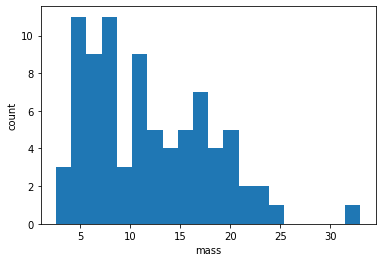

In [57]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [74]:
f = tp.locate(usersDf, 5, invert=False,minmass=10)
f.shape[0]

45

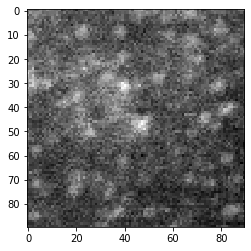

In [75]:
plt.imshow(usersDf);

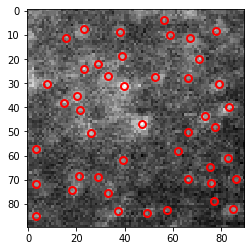

In [76]:
tp.annotate(f, usersDf,plot_style={'markersize':7});

In [ ]:
# track bright spots, works pretty well

In [6]:
directory = r'C:\data\191204\FSM-2D'
filename = '191204FSM47 FSM-2D Z.dat'
usersDf = pd.read_csv(directory+'\\' + filename, skiprows=0,delimiter ='\t',header=None).values



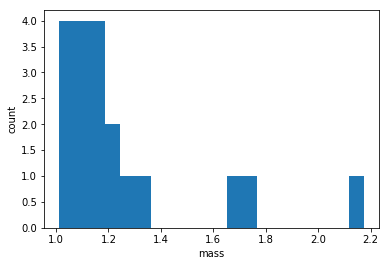

In [11]:
f = tp.locate(usersDf, 5, invert=False,minmass=1)
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [12]:
f.shape[0]

19

In [19]:

for i in np.array(list(range(f.shape[0]))):
    
    thisx,thisy =(10*f.iloc[i].x/100-5,-10*f.iloc[i].y/100+5)
    [FSM1.go_to_position(thisx,thisy)
    fname = "533A_SiV_checkV4 " + str(i).zfill(2)
    LFauto.set_filename(fname)
    LFauto.acquire()
    data_ref = LFauto.load_acquired_data(wdir, fname)
    lp.plot_live(data_ref.x,data_ref.y)]

    

KeyError: 1

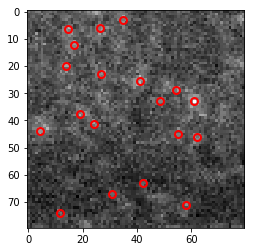

In [13]:
tp.annotate(f, usersDf,plot_style={'markersize':7});

In [ ]:

# usersDf = pd.read_csv(directory+'\\' + filename, skiprows=0,delimiter ='\t',header=None)
# FSM2D10 = usersDf.values

# xscan10 = np.linspace(-5,5,100)
# lp10 = LivePlot2D(xscan10,xscan10,FSM2D10,x_ext=6,y_ext=6)

# name = np.array(range(len(SiVlist)))
# lp10.ax.plot(SiVlist[:,0],SiVlist[:,1], marker='o',markeredgecolor='r',linestyle='None')


# ax.scatter(z, y)

for i, txt in enumerate(name):
    lp10.ax.annotate(txt, (SiVlist[i,0],SiVlist[i,1]),fontsize=14)
    
    
    
lp10.cb.set_clim(vmin=4.46,vmax=9)
lp10.cb.draw_all()
lp10.fig.canvas.draw()